In [1]:
import pandas as pd
import numpy as np

In [2]:
# ./当前目录 ../上级目录
data_path = './data/'
save_path = './result/'

In [3]:
# 读取共享单车轨迹数据-20201221
# 简介共享单车在使用时候产生的位置定位数据
# 具体数据项
# BICYCLE_ID：车辆编码，LOCATING_TIME：定位时间，LATITUDE：纬度（WGS84坐标），LONGITUDE：经度（WGS84坐标）
# 数据范围
# 2020年12月21日 上午06:00-10:00
def get_bypath(data_path, filename):
    bypath = pd.read_csv(data_path + filename)    
    return bypath

In [4]:
bypath1 = get_bypath(data_path, 'gxdc_gj20201221.csv')
bypath2 = get_bypath(data_path, 'gxdc_gj20201222.csv')
bypath3 = get_bypath(data_path, 'gxdc_gj20201223.csv')
bypath4 = get_bypath(data_path, 'gxdc_gj20201224.csv')
bypath5 = get_bypath(data_path, 'gxdc_gj20201225.csv')
# bypath = pd.concat(bypath1, bypath2, bypath3, bypath4, bypath5)
# pd.concat([
#     pd.read_csv(PATH + 'gxdc_gj20201221.csv'),
#     pd.read_csv(PATH + 'gxdc_gj20201222.csv'),
#     pd.read_csv(PATH + 'gxdc_gj20201223.csv'),
#     pd.read_csv(PATH + 'gxdc_gj20201224.csv'),
#     pd.read_csv(PATH + 'gxdc_gj20201225.csv')

# ])
bypath = bypath1.append(bypath2)
bypath = bypath.append(bypath3)
bypath = bypath.append(bypath4)
bypath = bypath.append(bypath5)
# bypath1.set_index('BICYCLE_ID')
# bypath2.set_index('BICYCLE_ID')
# bypath = pd.concat(bypath1,bypath2)
# bypath = bypath1.join(bypath2)
bypath.info()
bypath = bypath.sort_values(['BICYCLE_ID', 'LOCATING_TIME'])
bypath.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11920885 entries, 0 to 2569326
Data columns (total 10 columns):
 #   Column          Dtype  
---  ------          -----  
 0   BICYCLE_ID      object 
 1   LOCATING_TIME   object 
 2   LATITUDE        float64
 3   LONGITUDE       float64
 4   source          object 
 5   LOCATING_TIME1  object 
 6   date            object 
 7   day             int64  
 8   time            object 
 9   hour            int64  
dtypes: float64(2), int64(2), object(6)
memory usage: 1000.4+ MB


,LATITUDE,LONGITUDE,day,hour
count,1.192088e+07,1.192088e+07,1.192088e+07,1.192088e+07
mean,2.450373e+01,1.181120e+02,2.305376e+01,7.742647e+00
std,3.822377e-02,5.177484e-02,1.475251e+00,9.090383e-01
min,2.442406e+01,1.179086e+02,2.100000e+01,6.000000e+00
25%,2.447858e+01,1.180859e+02,2.200000e+01,7.000000e+00
50%,2.449319e+01,1.181127e+02,2.300000e+01,8.000000e+00
75%,2.452017e+01,1.181468e+02,2.400000e+01,8.000000e+00
max,2.610928e+01,1.193015e+02,2.500000e+01,9.000000e+00


In [5]:
# 1. 共享单车订单数据
# 简介共享单车使用时开锁和关锁信息的数据
# 具体数据项
# BICYCLE_ID：车辆编码，LATITUDE：纬度（WGS84坐标），LONGITUDE：经度（WGS84坐标），LOCK_STATUS：锁的状态（0-开锁，1-关锁），UPDATE_TIME：锁状态更新时间
# 数据范围
# 2020年12月21日-2020年12月25日 06：00-10：00（58.5292万条）

In [6]:
def get_byorder(data_path):
    byorder = pd.read_csv(data_path + 'gxdc_dd.csv')    
    return byorder

In [7]:
byorder = get_byorder(data_path)
byorder.info()
byorder.head(100)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 585292 entries, 0 to 585291
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   BICYCLE_ID   585292 non-null  object 
 1   LATITUDE     585292 non-null  float64
 2   LONGITUDE    585292 non-null  float64
 3   LOCK_STATUS  585292 non-null  int64  
 4   UPDATE_TIME  585292 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 22.3+ MB


,BICYCLE_ID,LATITUDE,LONGITUDE,LOCK_STATUS,UPDATE_TIME
0,f8f99ef8d9bd3942580c2f8f5d1232ba,24.495537,118.126619,0,2020/12/22 6:25:56
1,8d1abc077be52af3eecf8340f4ea6981,24.443596,118.083372,0,2020/12/22 6:25:57
2,1122da7c68701a8d60df2eb7a89b6452,24.485108,118.092266,1,2020/12/22 6:25:58
3,324943a3613a133055f4f2e4162cef5f,24.501391,118.083000,1,2020/12/22 6:25:59
4,f6720d758b03dcec0765e49b4ce46111,24.483700,118.117027,1,2020/12/22 6:25:59
...,...,...,...,...,...
95,291bf4c2bc13238634601e6c365ae137,24.506805,118.120210,1,2020/12/22 6:27:26
96,4262b1e7da64298f60d7ce71a3735748,24.496266,118.136167,0,2020/12/22 6:27:28
97,5f154c69c7b7564bb06e72d2f6f0bdf8,24.470726,118.088499,0,2020/12/22 6:26:42
98,9e99e229e25f1ea5c05cdc95ec4caca8,24.474582,118.150825,0,2020/12/22 6:26:40


In [8]:
print(byorder)

                              BICYCLE_ID   LATITUDE   LONGITUDE  LOCK_STATUS  \
0       f8f99ef8d9bd3942580c2f8f5d1232ba  24.495537  118.126619            0   
1       8d1abc077be52af3eecf8340f4ea6981  24.443596  118.083372            0   
2       1122da7c68701a8d60df2eb7a89b6452  24.485108  118.092266            1   
3       324943a3613a133055f4f2e4162cef5f  24.501391  118.083000            1   
4       f6720d758b03dcec0765e49b4ce46111  24.483700  118.117027            1   
...                                  ...        ...         ...          ...   
585287  da91f1e845f0032b880ed869559561f7  24.498980  118.115292            0   
585288  da91f1e845f0032b880ed869559561f7  24.499018  118.115386            0   
585289  da91f1e845f0032b880ed869559561f7  24.499066  118.115487            0   
585290  da91f1e845f0032b880ed869559561f7  24.499105  118.115578            0   
585291  da91f1e845f0032b880ed869559561f7  24.499186  118.115697            0   

               UPDATE_TIME  
0       20

In [9]:
# 1. 共享单车停车点位（电子围栏）数据
# 简介为规范共享单车停车秩序，统一划定的共享单车停放区域
# 具体数据项
# FENCE_ID：电子围栏唯一编号，FENCE_LOC：电子围栏位置坐标串（包括电子围栏所在位置四个顶点的坐标信息，WGS84坐标）
# 数据范围
# 厦门市思明区和湖里区（1.4071万条）

In [13]:
def get_bylocal(data_path):
    bylocal = pd.read_csv(data_path + 'gxdc_tcd.csv')    
    return bylocal

In [14]:
bylocal = get_bylocal(data_path)
bylocal.info()
print(bylocal)
# bylocal_info_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14071 entries, 0 to 14070
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   FENCE_ID   14071 non-null  object
 1   FENCE_LOC  14071 non-null  object
dtypes: object(2)
memory usage: 220.0+ KB
            FENCE_ID                                          FENCE_LOC
0      长乐路0_L_A17001  [118.103198,24.527338],[118.103224,24.527373],...
1      长乐路0_L_A17002  [118.103171,24.527303],[118.103198,24.527338],...
2      长乐路0_L_A17003  [118.103231,24.527386],[118.103257,24.527421],...
3      长乐路0_L_A17004  [118.103257,24.527421],[118.103282,24.527455],...
4      长乐路0_L_A17005  [118.102948,24.527003],[118.102979,24.527046],...
...              ...                                                ...
14066      龙虎西二里_L_1  [118.1163951015,24.4392429488],[118.1165434024...
14067      龙虎西二里_L_2  [118.1158786559,24.4392522243],[118.1160686589...
14068      龙虎西二里_L_3  [118.1155436336,24.43925

In [15]:
# temp = byorder_info_df[pd.to_datetime(byorder_info_df['UPDATE_TIME']).dt.hour.isin(np.arange(7, 9))]
# temp.describe
temp = byorder[pd.to_datetime(byorder['UPDATE_TIME']).dt.hour.isin(np.arange(7, 9)) & (byorder['LOCK_STATUS']==1)]
print(temp)
# time = byorder_info_df.set_index(pd.to_datetime(byorder_info_df['UPDATE_TIME'])).between_time("07:00:00", "09:00:00")
temp.info()

                              BICYCLE_ID   LATITUDE   LONGITUDE  LOCK_STATUS  \
1525    41d6a706967161549ac4ebb88a70a372  24.490770  118.149331            1   
1526    a1b49c3f3c9bac9c3346de082412ea49  24.523370  118.099101            1   
1529    8b853dcb622ec14d4b21d5a3e212ac45  24.497522  118.113245            1   
1530    1a52ebf655ae95c1b43dd4ae5513aa0a  24.473418  118.111952            1   
1534    92980f4382cc054e4f890b06c6d3c26c  24.536636  118.132975            1   
...                                  ...        ...         ...          ...   
585192  45ed9d679d429e0901c3a13022b7f1e7  24.524539  118.115650            1   
585197  c484462ac02bb64ee62a172319ec7cbe  24.534285  118.133540            1   
585199  e71fe60bd2d1a7c80f8654af8f6a38fb  24.462603  118.070928            1   
585200  a40cd4361e571a36ab4e887078f98f5a  24.524419  118.152023            1   
585201  c5e3f79760c5eb3f4e0aa6f0f5418351  24.488027  118.157727            1   

               UPDATE_TIME  
1525    20

In [16]:
temp.head(100)

,BICYCLE_ID,LATITUDE,LONGITUDE,LOCK_STATUS,UPDATE_TIME
1525,41d6a706967161549ac4ebb88a70a372,24.490770,118.149331,1,2020/12/22 7:19:48
1526,a1b49c3f3c9bac9c3346de082412ea49,24.523370,118.099101,1,2020/12/22 7:20:52
1529,8b853dcb622ec14d4b21d5a3e212ac45,24.497522,118.113245,1,2020/12/22 7:20:53
1530,1a52ebf655ae95c1b43dd4ae5513aa0a,24.473418,118.111952,1,2020/12/22 7:19:46
1534,92980f4382cc054e4f890b06c6d3c26c,24.536636,118.132975,1,2020/12/22 7:19:52
...,...,...,...,...,...
1728,5af3c710f5163aa088ece8668eb24df2,24.520220,118.095000,1,2020/12/22 7:20:32
1729,3631eb32b20c9451f90f27a3bfe7f055,24.525039,118.109164,1,2020/12/22 7:20:31
1732,e67ed0c16ed3e7c8ce0366fc176cdf56,24.518223,118.131998,1,2020/12/22 7:20:29
1734,16abf236a92c5376aaf56d4cd6eb5150,24.474182,118.108473,1,2020/12/22 7:19:10


In [17]:
temp.tail(100)

,BICYCLE_ID,LATITUDE,LONGITUDE,LOCK_STATUS,UPDATE_TIME
584911,cfab0fd4855d1aa37aea9121ce7d6a60,24.469773,118.089245,1,2020/12/25 8:07:48
584912,be587c4220d4b522117d8a84c25f1888,24.481030,118.079078,1,2020/12/25 8:07:48
584913,96a63f37bcbeea0243467eb6c0502641,24.464655,118.079054,1,2020/12/25 8:07:45
584915,3a2b316554c2d8cadb47277d63ab472d,24.494104,118.110849,1,2020/12/25 8:07:48
584916,31d333192e647793b58e873de06d6704,24.528216,118.151917,1,2020/12/25 8:07:46
...,...,...,...,...,...
585192,45ed9d679d429e0901c3a13022b7f1e7,24.524539,118.115650,1,2020/12/25 8:09:45
585197,c484462ac02bb64ee62a172319ec7cbe,24.534285,118.133540,1,2020/12/25 8:09:30
585199,e71fe60bd2d1a7c80f8654af8f6a38fb,24.462603,118.070928,1,2020/12/25 8:09:30
585200,a40cd4361e571a36ab4e887078f98f5a,24.524419,118.152023,1,2020/12/25 8:09:30


In [18]:
temp.set_index('UPDATE_TIME')
temp.sort_index(axis=0, ascending=True)

,BICYCLE_ID,LATITUDE,LONGITUDE,LOCK_STATUS,UPDATE_TIME
1525,41d6a706967161549ac4ebb88a70a372,24.490770,118.149331,1,2020/12/22 7:19:48
1526,a1b49c3f3c9bac9c3346de082412ea49,24.523370,118.099101,1,2020/12/22 7:20:52
1529,8b853dcb622ec14d4b21d5a3e212ac45,24.497522,118.113245,1,2020/12/22 7:20:53
1530,1a52ebf655ae95c1b43dd4ae5513aa0a,24.473418,118.111952,1,2020/12/22 7:19:46
1534,92980f4382cc054e4f890b06c6d3c26c,24.536636,118.132975,1,2020/12/22 7:19:52
...,...,...,...,...,...
585192,45ed9d679d429e0901c3a13022b7f1e7,24.524539,118.115650,1,2020/12/25 8:09:45
585197,c484462ac02bb64ee62a172319ec7cbe,24.534285,118.133540,1,2020/12/25 8:09:30
585199,e71fe60bd2d1a7c80f8654af8f6a38fb,24.462603,118.070928,1,2020/12/25 8:09:30
585200,a40cd4361e571a36ab4e887078f98f5a,24.524419,118.152023,1,2020/12/25 8:09:30


In [19]:
bylocal.describe

<bound method NDFrame.describe of             FENCE_ID                                          FENCE_LOC
0      长乐路0_L_A17001  [118.103198,24.527338],[118.103224,24.527373],...
1      长乐路0_L_A17002  [118.103171,24.527303],[118.103198,24.527338],...
2      长乐路0_L_A17003  [118.103231,24.527386],[118.103257,24.527421],...
3      长乐路0_L_A17004  [118.103257,24.527421],[118.103282,24.527455],...
4      长乐路0_L_A17005  [118.102948,24.527003],[118.102979,24.527046],...
...              ...                                                ...
14066      龙虎西二里_L_1  [118.1163951015,24.4392429488],[118.1165434024...
14067      龙虎西二里_L_2  [118.1158786559,24.4392522243],[118.1160686589...
14068      龙虎西二里_L_3  [118.1155436336,24.4392542666],[118.1156823587...
14069      龙虎西二里_L_4  [118.1152026479,24.4403235625],[118.1152037138...
14070      龙虎西二里_R_1  [118.1157293307,24.4391610628],[118.115590487,...

[14071 rows x 2 columns]>

In [20]:
# import csv
# import numpy as np
# from shapely.geometry import Point
# from shapely.geometry.polygon import Polygon

In [21]:
# def load_fence(filepath):        
#     buffer = []
#     with open(filepath, 'rt', encoding='utf-8-sig') as vsvfile:
#         reader = csv.reader(vsvfile)
#         for row in reader:
#             buffer = buffer + (list(map(float,row)))
#     buffer = np.array(buffer).reshape(len(buffer) // 2 , 2)
#     return buffer

In [22]:
# bylocal = get_bylocal(data_path)
# bylocal.info()
# bylocal.iloc[:,1].to_csv('bylocal.csv')
# fence = load_fence('bylocal.csv')
# # fence = load_fence(bylocal.iloc[:, 1:0])

In [23]:
# point = Point(longitude,latitude)
# if Polygon(fence).contains(point) == True:
#     print("在此区域内")
#     return 0

In [24]:
temp.iloc[:, 0:3].to_csv('order_path.csv')
temp.iloc[:, 0:3]

,BICYCLE_ID,LATITUDE,LONGITUDE
1525,41d6a706967161549ac4ebb88a70a372,24.490770,118.149331
1526,a1b49c3f3c9bac9c3346de082412ea49,24.523370,118.099101
1529,8b853dcb622ec14d4b21d5a3e212ac45,24.497522,118.113245
1530,1a52ebf655ae95c1b43dd4ae5513aa0a,24.473418,118.111952
1534,92980f4382cc054e4f890b06c6d3c26c,24.536636,118.132975
...,...,...,...
585192,45ed9d679d429e0901c3a13022b7f1e7,24.524539,118.115650
585197,c484462ac02bb64ee62a172319ec7cbe,24.534285,118.133540
585199,e71fe60bd2d1a7c80f8654af8f6a38fb,24.462603,118.070928
585200,a40cd4361e571a36ab4e887078f98f5a,24.524419,118.152023


In [25]:
# import numpy as np
# import pandas as pd
# import pickle
# from matplotlib.path import Path


# with open('order_path.csv', 'rb') as f:   # 要判断的经纬度数据
#     plots = pickle.load(f)

# # 例如我要判断该经纬度点在不在广州
	
# boundary = pd.read_csv('bylocal.csv')	# 广州外多边形的WGS84坐标经纬度点			
# path = Path(boundary, closed=True)

# is_get_on_in_guangzhou = path.contains_points(plots_get_on[['LONGITUDE', 'LATITUDE']])
# plots = plots[is_get_on_in_guangzhou]
# plots

In [26]:
import folium
m = folium.Map(location=[24.482426, 118.157606], zoom_start=12)
my_PolyLine=folium.PolyLine(locations=bypath[bypath['BICYCLE_ID'] == '000152773681a23a7f2d9af8e8902703'][['LATITUDE', 'LONGITUDE']].values, weight=5)
print(bypath[bypath['BICYCLE_ID'] == '000152773681a23a7f2d9af8e8902703'][['LATITUDE', 'LONGITUDE']].values)
m.add_child(my_PolyLine)

[[ 24.49983386 118.12660348]
 [ 24.49948288 118.12645087]
 [ 24.49899459 118.12642035]
 [ 24.49846625 118.12635167]
 [ 24.4979112  118.12632115]
 [ 24.49753163 118.12627536]
 [ 24.49713681 118.12629826]
 [ 24.4971196  118.12597777]
 [ 24.49687537 118.1254131 ]
 [ 24.49656636 118.12532153]
 [ 24.49626499 118.12526048]
 [ 24.49601131 118.12522996]
 [ 24.49587969 118.12514602]
 [ 24.49575181 118.12462714]
 [ 24.49549043 118.12417693]
 [ 24.49484756 118.1235741 ]]


In [27]:
def bike_fence_format(s):
    s = s.replace('[', '').replace(']', '').split(',')
    s = np.array(s).astype(float).reshape(5, -1)
    return s

# 共享单车停车点位（电子围栏）数据
# bike_fence = bylocal
bike_fence = pd.read_csv(data_path + 'gxdc_tcd.csv')
bike_fence['FENCE_LOC'] = bike_fence['FENCE_LOC'].apply(bike_fence_format)

In [28]:
# def parse_zhch(s):
#     return str(str(s).encode('ascii' , 'xmlcharrefreplace'))[2:-1]
# # 悬浮弹出信息
# tooltip = parse_zhch('嘿！')

m = folium.Map(location=[24.482426, 118.157606], zoom_start=12)
bi = bike_fence['FENCE_LOC'].values[:100]
# print(bi)
for row in bi:
#     print(row)
# for data in bike_fence['FENCE_LOC'].values[:100]:
#     folium.Marker(
#         data[0, ::-1]
#     ).add_to(m)
# m
    for fence_item in row:
#         fence=[fence_item[1], fence_item[0]]
#         print(fence)
        folium.Marker(
            location = [fence_item[1], fence_item[0]]
#             location = fence_item.reverse()
        ).add_to(m)
m   

# fence_loc = pd.DataFrame(bike_fence['FENCE_LOC'])
# fence_loc.info()
# fence_loc.iloc[0,:]
# print(fence_loc.iloc[0,:])
# print(bike_fence['FENCE_LOC'])
# bi[0][0,::-1]
# for data in bi:
#     loc = data[0, ::-1]
#     print(location)
# #     folium.Marker(location=loc)
# # self, location=None, popup=None, tooltip=None, icon=None, draggable=False, **kwargs
# #     folium.Marker(location, popup='popup', tooltip='tooltip', icon='icon', draggable=True).add_to(m)
# #     print(location)
# # print(location)

# # for data in bike_fence['FENCE_LOC'].values[:100]:
#     folium.Marker(
#         data[0, ::-1]
#     ).add_to(m)

In [29]:
# 共享单车订单数据
bike_order = byorder
bike_order = byorder.sort_values(['BICYCLE_ID', 'UPDATE_TIME'])

In [30]:
m = folium.Map(location=[24.482426, 118.157606], zoom_start=12)
my_PolyLine=folium.PolyLine(locations=byorder[byorder['BICYCLE_ID'] == '0000ff105fd5f9099b866bccd157dc50'][['LATITUDE', 'LONGITUDE']].values,weight=5)
m.add_child(my_PolyLine)

In [31]:
# 得出停车点 LATITUDE 范围
bike_fence['MIN_LATITUDE'] = bike_fence['FENCE_LOC'].apply(lambda x: np.min(x[:, 1]))
bike_fence['MAX_LATITUDE'] = bike_fence['FENCE_LOC'].apply(lambda x: np.max(x[:, 1]))

# 得到停车点 LONGITUDE 范围
bike_fence['MIN_LONGITUDE'] = bike_fence['FENCE_LOC'].apply(lambda x: np.min(x[:, 0]))
bike_fence['MAX_LONGITUDE'] = bike_fence['FENCE_LOC'].apply(lambda x: np.max(x[:, 0]))

from geopy.distance import geodesic
# 根据停车点 范围 计算具体的面积
bike_fence['FENCE_AREA'] = bike_fence.apply(lambda x: geodesic(
    (x['MIN_LATITUDE'], x['MIN_LONGITUDE']), (x['MAX_LATITUDE'], x['MAX_LONGITUDE'])
).meters, axis=1)

# 根据停车点 计算中心经纬度
bike_fence['FENCE_CENTER'] = bike_fence['FENCE_LOC'].apply(
    lambda x: np.mean(x[:-1, ::-1], 0)
)

In [32]:
# 通过geohash可以将一个经纬度编码为一个字符串，需要注意的是precision控制了编码精度，数值越大覆盖范围越小，数值越小覆盖范围越大。
# 需要注意：这里的precision与具体的定位点范围强相关，需要根据具体的赛题要求完成设置。
import geohash
bike_order['geohash'] = bike_order.apply(
    lambda x: geohash.encode(x['LATITUDE'], x['LONGITUDE'], precision=6), 
axis=1)

bike_fence['geohash'] = bike_fence['FENCE_CENTER'].apply(
    lambda x: geohash.encode(x[0], x[1], precision=6)
)

In [33]:
bike_order[bike_order['geohash'] == 'ws7gx9']

,BICYCLE_ID,LATITUDE,LONGITUDE,LOCK_STATUS,UPDATE_TIME,geohash
487671,004f9873bb4e6d9cf0ad25cf9f7eb24a,24.527919,118.111688,0,2020/12/24 7:18:01,ws7gx9
502074,00753953f3c84a8abd1f6a54cd621d38,24.531710,118.108121,0,2020/12/23 8:21:52,ws7gx9
517551,00753953f3c84a8abd1f6a54cd621d38,24.531751,118.108162,1,2020/12/23 8:27:35,ws7gx9
465269,00af0ecaaee31786f2283ef81c10174a,24.531374,118.107521,1,2020/12/24 8:25:15,ws7gx9
65021,00d78f5b3073d8c82b3e848b1a3e4edd,24.527360,118.103985,1,2020/12/21 8:23:15,ws7gx9
...,...,...,...,...,...,...
408279,fe475249d02d3e47f07eb5c94cdc4a1b,24.531764,118.108175,1,2020/12/24 8:27:04,ws7gx9
473797,fe976788585381d7aed4db1823d08227,24.527876,118.111530,1,2020/12/24 7:19:18,ws7gx9
179689,feb96694fcef6dbcd86f14de19f1e692,24.529445,118.109238,0,2020/12/23 7:25:21,ws7gx9
491991,feda51ed35897b35fb4056957a75bda9,24.532177,118.107760,0,2020/12/24 7:31:22,ws7gx9


In [34]:
## 区域流量与潮汐统计
# 在完成具体的经纬度匹配后，接下来就需要完成具体的区域流量统计，即统计某一范围内的不同时间的流量（入流量和出流量）。
# 首先对订单数据进行时间提取：
bike_order['UPDATE_TIME'] = pd.to_datetime(bike_order['UPDATE_TIME'])
bike_order['DAY'] = bike_order['UPDATE_TIME'].dt.day.astype(object)
bike_order['DAY'] = bike_order['DAY'].apply(str)

bike_order['HOUR'] = bike_order['UPDATE_TIME'].dt.hour.astype(object)
bike_order['HOUR'] = bike_order['HOUR'].apply(str)
bike_order['HOUR'] = bike_order['HOUR'].str.pad(width=2,side='left',fillchar='0')

# 日期和时间进行拼接
bike_order['DAY_HOUR'] = bike_order['DAY'] + bike_order['HOUR']

In [35]:
# 使用透视表统计每个区域在不同时间的入流量和出流量：
bike_inflow = pd.pivot_table(bike_order[bike_order['LOCK_STATUS'] == 1], 
                   values='LOCK_STATUS', index=['geohash'],
                    columns=['DAY_HOUR'], aggfunc='count', fill_value=0
)

bike_outflow = pd.pivot_table(bike_order[bike_order['LOCK_STATUS'] == 0], 
                   values='LOCK_STATUS', index=['geohash'],
                    columns=['DAY_HOUR'], aggfunc='count', fill_value=0
)

C:\Users\admin\AppData\Local\Programs\Python\Python38\Lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 20837 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\admin\AppData\Local\Programs\Python\Python38\Lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 27969 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\admin\AppData\Local\Programs\Python\Python38\Lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 37327 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\admin\AppData\Local\Programs\Python\Python38\Lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 20986 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\admin\AppData\Local\Programs\Python\Python38\Lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 20837 missing from current font.
  font.set_text(s

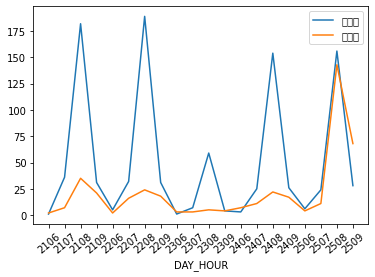

In [36]:
# 通过以上代码就可以统计完成区域流量，接下来可以做简单的绘图：
import matplotlib.pyplot as plt #画图工具
bike_inflow.loc['wsk593'].plot()
bike_outflow.loc['wsk593'].plot()
plt.xticks(list(range(bike_inflow.shape[1])), bike_inflow.columns, rotation=40)
plt.legend(['入流量', '出流量'])

C:\Users\admin\AppData\Local\Programs\Python\Python38\Lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 20837 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\admin\AppData\Local\Programs\Python\Python38\Lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 27969 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\admin\AppData\Local\Programs\Python\Python38\Lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 37327 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\admin\AppData\Local\Programs\Python\Python38\Lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 20986 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\admin\AppData\Local\Programs\Python\Python38\Lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 20837 missing from current font.
  font.set_text(s

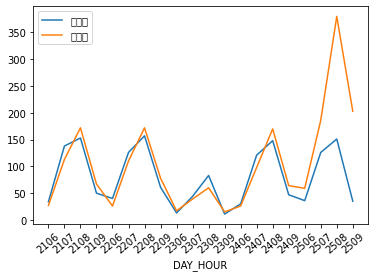

In [37]:
bike_inflow.loc['wsk52r'].plot()
bike_outflow.loc['wsk52r'].plot()
plt.xticks(list(range(bike_inflow.shape[1])), bike_inflow.columns, rotation=40)
plt.legend(['入流量', '出流量'])

In [38]:
# 方法1：Geohash匹配计算潮汐
# 由于赛题需要统计工作日早高峰期间的潮汐现象，所以我们可以按照天进行单车流量统计：
bike_inflow = pd.pivot_table(bike_order[bike_order['LOCK_STATUS'] == 1], 
                   values='LOCK_STATUS', index=['geohash'],
                    columns=['DAY'], aggfunc='count', fill_value=0
)

bike_outflow = pd.pivot_table(bike_order[bike_order['LOCK_STATUS'] == 0], 
                   values='LOCK_STATUS', index=['geohash'],
                    columns=['DAY'], aggfunc='count', fill_value=0
)

In [39]:
# 根据入流量和出流量，可以计算得到每个位置的留存流量：

bike_remain = (bike_inflow - bike_outflow).fillna(0)

# 存在骑走的车数量 大于 进来的车数量
bike_remain[bike_remain < 0] = 0  

# 按照天求平均
bike_remain = bike_remain.sum(1)

In [40]:
# 这里假设我们需要统计街道维度的潮汐情况，我们可以先把街道信息提取，然后计算密度。这里我们需要计算每个街道不同停车点的留存车辆，所以不能重复统计。

# 总共有993条街
bike_fence['STREET'] = bike_fence['FENCE_ID'].apply(lambda x: x.split('_')[0])

# 留存车辆 / 街道停车位总面积，计算得到密度
bike_density = bike_fence.groupby(['STREET'])['geohash'].unique().apply(
    lambda hs: np.sum([bike_remain[x] for x in hs])
) / bike_fence.groupby(['STREET'])['FENCE_AREA'].sum()

# 按照密度倒序
bike_density = bike_density.sort_values(ascending=False).reset_index()
bike_density.head(40)

,STREET,0
0,新丰路(火炬路至火炬北路),264.109027
1,金榜西路0,261.504821
2,市政19,196.202314
3,市政2,192.822917
4,市政1,192.085638
5,市政20,190.696068
6,市政11,189.576098
7,市政15,185.743613
8,市政17,174.770755
9,市政6,171.897058


In [41]:
## 方法2：距离匹配计算潮汐
# 如果使用Geohash来统计会存在一个问题，统计的方法会不准确，导致只能精确到街道信息。本节将使用经纬度距离匹配的方法来进行尝试，
# 具体的思路为计算订单最近的停车点，进而计算具体的潮汐情况。
# 对于经纬度距离计算，可以直接使用sklearn中的NearestNeighbors，通过设置haversine距离可以很方便的完成最近停车点的计算。
from sklearn.neighbors import NearestNeighbors

# self, *, n_neighbors=5, radius=1.0,
#                  algorithm='auto', leaf_size=30, metric='minkowski',
#                  p=2, metric_params=None, n_jobs=None
# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.DistanceMetric.html
knn = NearestNeighbors(metric = "haversine", n_jobs=-1, algorithm='brute')
# knn = NearestNeighbors(algorithm='brute',  metric='minkowski', n_jobs=-1)
knn.fit(np.stack(bike_fence['FENCE_CENTER'].values))

NearestNeighbors(algorithm='brute', metric='haversine', n_jobs=-1)

In [42]:
# 需要11s左右
dist, index = knn.kneighbors(bike_order[['LATITUDE','LONGITUDE']].values[:20000], n_neighbors=1)

# 计算订单中对应的停车点位置：

# 需要11s左右
dist, index = knn.kneighbors(bike_order[['LATITUDE','LONGITUDE']].values[:], n_neighbors=1)

In [43]:
# 需要11s左右
dist, index = knn.kneighbors(bike_order[['LATITUDE','LONGITUDE']].values[:], n_neighbors=1)
# dist, index = knn.kneighbors(bike_order[['LATITUDE','LONGITUDE']].values[:2000], n_neighbors=1)

In [44]:
# 但是如果直接使用NearestNeighbors计算速度会非常慢，如果是全量定量订单数据可能需要较长时间。因此可以用hnsw做近似搜索，速度较快但精度差一点。

# import hnswlib
# import numpy as np

# p = hnswlib.Index(space='l2', dim=2)
# p.init_index(max_elements=300000, ef_construction=1000, M=32)
# p.set_ef(1024)
# p.set_num_threads(14)

# p.add_items(np.stack(bike_fence['FENCE_CENTER'].values))

In [45]:
# # 计算所有订单的停车位置：

# index, dist = p.knn_query(bike_order[['LATITUDE','LONGITUDE']].values[:], k=1)

In [46]:
# 然后计算所有停车点的潮汐流量：

bike_order['fence'] = bike_fence.iloc[index.flatten()]['FENCE_ID'].values

bike_inflow = pd.pivot_table(bike_order[bike_order['LOCK_STATUS'] == 1], 
                   values='LOCK_STATUS', index=['fence'],
                    columns=['DAY'], aggfunc='count', fill_value=0
)

bike_outflow = pd.pivot_table(bike_order[bike_order['LOCK_STATUS'] == 0], 
                   values='LOCK_STATUS', index=['fence'],
                    columns=['DAY'], aggfunc='count', fill_value=0
)

bike_remain = (bike_inflow - bike_outflow).fillna(0)
bike_remain[bike_remain < 0] = 0  
bike_remain = bike_remain.sum(1)

In [47]:
# 计算停车点的密度：
bike_density = bike_remain / bike_fence.set_index('FENCE_ID')['FENCE_AREA']
bike_density = bike_density.sort_values(ascending=False).reset_index()
bike_density = bike_density.fillna(0)
bike_density
bike_density.head(100)

,index,0
0,观日路(望海路至会展路段 )_R_1,132.054140
1,象屿路0_R_1,100.175756
2,望海路0_R_2,79.024606
3,望海路0_R_1,65.889561
4,云顶北路0_R_45,52.407645
...,...,...
95,莲前东路0_R_A02006,11.715055
96,曾厝垵西路_R_2,11.677625
97,高崎南五路_R_B27002,11.594824
98,云顶中路0_L_8,11.594211


In [48]:
bike_fence

# # print(bike_fence['bike_fence'])

,FENCE_ID,FENCE_LOC,MIN_LATITUDE,MAX_LATITUDE,MIN_LONGITUDE,MAX_LONGITUDE,FENCE_AREA,FENCE_CENTER,geohash,STREET
0,长乐路0_L_A17001,"[[118.103198, 24.527338], [118.103224, 24.5273...",24.527331,24.527373,118.103198,118.103236,6.039052,"[24.527352, 118.10321675]",ws7gx9,长乐路0
1,长乐路0_L_A17002,"[[118.103171, 24.527303], [118.103198, 24.5273...",24.527296,24.527338,118.103171,118.103209,6.039053,"[24.527317000000004, 118.10319]",ws7gx9,长乐路0
2,长乐路0_L_A17003,"[[118.103231, 24.527386], [118.103257, 24.5274...",24.527378,24.527421,118.103231,118.103270,6.188997,"[24.527399499999998, 118.1032505]",ws7gx9,长乐路0
3,长乐路0_L_A17004,"[[118.103257, 24.527421], [118.103282, 24.5274...",24.527413,24.527455,118.103257,118.103295,6.039051,"[24.527434, 118.10327600000001]",ws7gx9,长乐路0
4,长乐路0_L_A17005,"[[118.102948, 24.527003], [118.102979, 24.5270...",24.526995,24.527046,118.102948,118.102992,7.196632,"[24.5270205, 118.10297]",ws7gx3,长乐路0
...,...,...,...,...,...,...,...,...,...,...
14066,龙虎西二里_L_1,"[[118.1163951015, 24.4392429488], [118.1165434...",24.439229,24.439244,118.116395,118.116543,15.136775,"[24.4392363933, 118.11646929919999]",ws7gpc,龙虎西二里
14067,龙虎西二里_L_2,"[[118.1158786559, 24.4392522243], [118.1160686...",24.439240,24.439252,118.115879,118.116069,19.317500,"[24.43924593495, 118.11597365625]",ws7gpc,龙虎西二里
14068,龙虎西二里_L_3,"[[118.1155436336, 24.4392542666], [118.1156823...",24.439238,24.439254,118.115543,118.115682,14.201846,"[24.439245983600003, 118.11561291917499]",ws7gpc,龙虎西二里
14069,龙虎西二里_L_4,"[[118.1152026479, 24.4403235625], [118.1152037...",24.440323,24.440444,118.115203,118.115219,13.458712,"[24.440383766375, 118.115210615875]",ws7gpc,龙虎西二里


In [49]:
# FENCE_ID |FENCE_TYPE|BELONG_AREA
# 长青路_R_9|1|XXXX
# 长青路_R_10|0|XXXX
# 输出结果字段注释
# 字段名 字段释意 备注
# FENCE_ID 电子围栏唯一编号 {长青路_R_9，长青路_R_10，…}
# FENCE_TYPE 是否属于在 40 个潮汐现象最明 {0：否；1：是}
# 第 15 页 共 18 页
# 显的区域内
# BELONG_AREA 所属区域 FENCE_TYPE 值为 1 时，电子围栏 所对应的所属区域的名称（40 个）
# 注：输出结果文件里需要有表头，结果文件为 Utf-8 格式的 result.txt 文件，文件 内每字段以英文半角竖线“|”间隔。

In [62]:
# df = pd.DataFrame(data = {'col_0': [1,2,3],
#                           'col_1':list('abc'),
#                           'col_2': [1.2, 2.2, 3.2]},
#                   index = ['row_%d'%i index = ['row_%d'%i for i in range(3)])
# df_demo.sort_values('Height', ascending=False).head()
# df_demo.apply(lambda x:x.mean(), axis=1).head()
# bike_density.head(40)
# print(bike_density.head(40).iloc[:,0].values)
result = pd.DataFrame(columns=['FENCE_ID', 'FENCE_TYPE', 'BELONG_AREA'])
result['FENCE_ID'] = bike_fence['FENCE_ID']
result['FENCE_TYPE'] = 0
result['BELONG_AREA'] = 'china'
top40 = bike_density.head(100).iloc[:,0]
print(top40)
result_top40 = result.loc[result['FENCE_ID'].isin(top40)]
print(result_top40)
result['FENCE_TYPE'].loc[result['FENCE_ID'].isin(top40)]=1
# print(result_top40)
# result.query('(FENCE_TYPE)==1')
# print(result[result['FENCE_TYPE']==1])
# bike_density = bike_density.drop(0, axis=1)
# bike_density.columns = ['FENCE_ID', 'FENCE_TYPE', 'BELONG_AREA']
# bike_density.to_csv('result.txt', index=None, sep='|')

# result = result.drop(0, axis=1)
print(result)
result.columns = ['FENCE_ID', 'FENCE_TYPE', 'BELONG_AREA']
result.to_csv(save_path + 'result.txt', index=None, sep='|', encoding='utf-8')

0     观日路(望海路至会展路段 )_R_1
1               象屿路0_R_1
2               望海路0_R_2
3               望海路0_R_1
4             云顶北路0_R_45
             ...        
95        莲前东路0_R_A02006
96             曾厝垵西路_R_2
97        高崎南五路_R_B27002
98             云顶中路0_L_8
99              云顶北路_R_4
Name: index, Length: 100, dtype: object
              FENCE_ID  FENCE_TYPE BELONG_AREA
553     云顶中路0_L_A03002           0       china
554     云顶中路0_L_A03003           0       china
565         云顶中路0_L_30           0       china
575          云顶中路0_L_4           0       china
586          云顶中路0_L_5           0       china
...                ...         ...         ...
13425       高崎南五路0_L_9           0       china
13432       高崎南五路0_R_7           0       china
13449   高崎南五路_R_B27002           0       china
13491  高崎南十二路_R_B27001           0       china
13832         龙伏路0_L_4           0       china

[100 rows x 3 columns]
            FENCE_ID  FENCE_TYPE BELONG_AREA
0      长乐路0_L_A17001           0       china
1      

C:\Users\admin\AppData\Local\Programs\Python\Python38\Lib\site-packages\pandas\core\indexing.py:1636: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [52]:
# re = result.filter(result['FENCE_TYPE']==1)
# print(re)
print(result[(result['FENCE_TYPE']==1)])

result[(result['FENCE_TYPE']==1)].count()

              FENCE_ID  FENCE_TYPE BELONG_AREA
553     云顶中路0_L_A03002           1       china
554     云顶中路0_L_A03003           1       china
565         云顶中路0_L_30           1       china
575          云顶中路0_L_4           1       china
586          云顶中路0_L_5           1       china
...                ...         ...         ...
13425       高崎南五路0_L_9           1       china
13432       高崎南五路0_R_7           1       china
13449   高崎南五路_R_B27002           1       china
13491  高崎南十二路_R_B27001           1       china
13832         龙伏路0_L_4           1       china

[100 rows x 3 columns]


FENCE_ID       100
FENCE_TYPE     100
BELONG_AREA    100
dtype: int64

In [53]:
# result[10:10]
# result[3:10]
result[10:3]
# result.FENCE_ID
# result.FENCE_TYPE
# bike_density

,FENCE_ID,FENCE_TYPE,BELONG_AREA


In [63]:
rs = result.groupby('FENCE_ID')['FENCE_TYPE']

In [64]:
result.drop_duplicates()

,FENCE_ID,FENCE_TYPE,BELONG_AREA
0,长乐路0_L_A17001,0,china
1,长乐路0_L_A17002,0,china
2,长乐路0_L_A17003,0,china
3,长乐路0_L_A17004,0,china
4,长乐路0_L_A17005,0,china
...,...,...,...
14066,龙虎西二里_L_1,0,china
14067,龙虎西二里_L_2,0,china
14068,龙虎西二里_L_3,0,china
14069,龙虎西二里_L_4,0,china


In [65]:
rs.idxmin()

FENCE_ID
七星西路0_L_1       65
七星西路0_L_2       66
七星西路0_L_3       67
七星西路0_R_1       68
七星西路0_R_2       69
             ...  
龙虎西二里_L_1    14066
龙虎西二里_L_2    14067
龙虎西二里_L_3    14068
龙虎西二里_L_4    14069
龙虎西二里_R_1    14070
Name: FENCE_TYPE, Length: 14071, dtype: int64

In [66]:
rs.quantile(0.75)

FENCE_ID
七星西路0_L_1    0.0
七星西路0_L_2    0.0
七星西路0_L_3    0.0
七星西路0_R_1    0.0
七星西路0_R_2    0.0
            ... 
龙虎西二里_L_1    0.0
龙虎西二里_L_2    0.0
龙虎西二里_L_3    0.0
龙虎西二里_L_4    0.0
龙虎西二里_R_1    0.0
Name: FENCE_TYPE, Length: 14071, dtype: float64

In [67]:
rs.agg(['sum', 'idxmax', 'skew'])

,sum,idxmax,skew
FENCE_ID,,,
七星西路0_L_1,0,65,NaN
七星西路0_L_2,0,66,NaN
七星西路0_L_3,0,67,NaN
七星西路0_R_1,0,68,NaN
七星西路0_R_2,0,69,NaN
...,...,...,...
龙虎西二里_L_1,0,14066,NaN
龙虎西二里_L_2,0,14067,NaN
龙虎西二里_L_3,0,14068,NaN


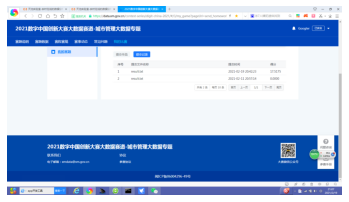

In [69]:
import matplotlib.pyplot as plt # plt 用于显示图片
import matplotlib.image as mpimg # mpimg 用于读取图片
import numpy as np

lena = mpimg.imread('score.png') # 读取和代码处于同一目录下的 lena.png
# 此时 lena 就已经是一个 np.array 了，可以对它进行任意处理
lena.shape #(512, 512, 3)

plt.imshow(lena) # 显示图片
plt.axis('off') # 不显示坐标轴
plt.show()